### Practice: Parameter Efficient Fine-Tuning
In this notebook, you're gonna fine-tune large language models within limited GPU memory.

In [82]:
#!g1.1
%pip install --quiet transformers==4.34.1 accelerate==0.24.0 sentencepiece==0.1.99 optimum==1.13.2 peft==0.5.0 bitsandbytes==0.41.2.post2

import torch
import torch.nn as nn
import torch.nn.functional as F

import transformers
from tqdm.auto import tqdm, trange
assert torch.cuda.is_available(), "you need cuda for this part"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [83]:
#!g1.1
model_name = 'Enoch/llama-7b-hf'

# loading Llama tokenizer ...
tokenizer = transformers.LlamaTokenizer.from_pretrained(model_name, device_map=device)
tokenizer.pad_token_id = tokenizer.eos_token_id

# ... and the model itself
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_name, device_map='auto', low_cpu_mem_usage=True, offload_state_dict=True,
    load_in_4bit=True, torch_dtype=torch.float32,  # weights are 4-bit; layernorms and activations are fp32
)
for param in model.parameters():
    param.requires_grad=False

model.gradient_checkpointing_enable()  # only store a small subset of activations, re-compute the rest.
model.enable_input_require_grads()     # override an implementation quirk in gradient checkpoints that disables backprop unless inputs require grad
# more on gradient checkpointing: https://pytorch.org/docs/stable/checkpoint.html https://arxiv.org/abs/1604.06174

tokenizer_config.json:   0%|          | 0.00/218 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

pytorch_model-00001-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00002-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00003-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00004-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00005-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00006-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00007-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00008-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00009-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00010-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00011-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00012-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00013-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00014-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00015-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00016-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00017-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00018-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00019-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00020-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00021-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00022-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00023-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00024-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00025-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00026-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00027-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00028-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00029-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00030-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00031-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00032-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00033-of-00033.bin:   0%|          | 0.00/524M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/151 [00:00<?, ?B/s]

### Prompt tuning: the story of a fox (2 pts)

![img](https://i.imgur.com/Ux3qQAu.png) (source: theodd1souts.fandom.com)

In [15]:
#!g1.1
prompt = 'A quick brown fox'
batch = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)

for i in range(10):
    next_token = model(**batch).logits[0, -1].argmax(-1).reshape(1, 1)
    batch['input_ids'] = torch.cat([batch['input_ids'], next_token], dim=-1)
    batch['attention_mask'] = torch.cat([batch['attention_mask'], torch.ones_like(next_token)], dim=-1)

print("\nOutput:", tokenizer.decode(batch['input_ids'][0].cpu().numpy().tolist()))

2023-11-27 17:53:06.339607: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



Output: <s>A quick brown fox jumps over the lazy dog.
A quick


What a blatant lie! This particular fox assures you that it didn't in fact jump over the lazy dog. No, sir! The fox was just minding its own business. __Your task is to train the model to say truth: no dog was jumped over today.__

In [16]:
#!g1.1
the_truth = "A quick brown fox did not jump over the lazy dog. Besides, that dog deserved it anyway!"
batch = tokenizer(the_truth, return_tensors='pt', return_token_type_ids=False).to(device)
outputs = model(**batch)

next_word_logits = outputs.logits[:, :-1]
true_next_tokens = batch['input_ids'][:, 1:]
loss = F.cross_entropy(next_word_logits.flatten(0, 1), true_next_tokens.flatten(0, 1))

print("Loss:", loss)

Loss: tensor(3.0725, device='cuda:0', grad_fn=<NllLossBackward0>)


Except, we can't train the entire model - that would be 28GB gradients in float32. Instead, let's run [prompt tuning](https://arxiv.org/abs/2104.08691).

![img](https://i.imgur.com/VwNNKnb.png)


In [24]:
#!g1.1
class WordEmbeddingsWithLearnedPrompts(nn.Module):
    """
    To perform prompt tuning, you will need to replace model's original word embeddings with a layer - THIS layer
     - that inserts trainable prompts instead of the first N token embeddings. """

    def __init__(self, word_embeddings: nn.Embedding, num_prompts: int):
        super().__init__()
        self.original_word_embeddings = word_embeddings
        self.num_prompts = num_prompts
        self.learnable_prompts = nn.Parameter(
            torch.randn(1, num_prompts, word_embeddings.embedding_dim), requires_grad=True)

    def forward(self, input_ids: torch.LongTensor):
        # input_ids shape: [batch_size, seq length]
        assert input_ids.dtype == torch.int64
        assert input_ids.shape[1] > self.num_prompts
        assert torch.all(input_ids[:, :self.num_prompts] == tokenizer.pad_token_id).item(), "don't forget to prepend several BOS tokens to input_ids"

        # Your task: embed input_ids, but replace the first :num_prompts: tokens with self.learnable_prompts
        # This is because we will prepend :num_prompts: padding tokens at the beginning

        # After you are done, you must produce a word embedding vector for each token in input_ids,
        # except that the first :num_prompts: vectors should equal learnable_prompts;
        # any additional vectors after first :num_prompts: ones should be embedded as usual
        # Note: since you're dealing with trainable params, please torch.cat instead of item assignment

        # print(self.learnable_prompts.shape, self.original_word_embeddings.weight.shape)
        # self.original_word_embeddings.weight = torch.cat((self.learnable_prompts[0], self.original_word_embeddings.weight), 0)

        self.original_word_embeddings.weight[: self.num_prompts] = self.learnable_prompts

        new_embed = self.original_word_embeddings(torch.unsqueeze(torch.arange(self.num_prompts).to(device), 0))
        old_embed = self.original_word_embeddings(input_ids[:, self.num_prompts:])
        return torch.cat((new_embed, old_embed), 1)

In [25]:
#!g1.1
num_prompts = 16
test_emb_layer = WordEmbeddingsWithLearnedPrompts(model.model.embed_tokens, num_prompts=num_prompts).to(device)
test_input_ids = tokenizer("a cat say on a may", return_tensors='pt')['input_ids'].to(device)

space_for_prompts = torch.full([len(test_input_ids), num_prompts], fill_value=tokenizer.pad_token_id,
                               dtype=torch.int64, device=device)
test_inputs_with_prompts = torch.cat([space_for_prompts, test_input_ids], dim=1)

with torch.cuda.amp.autocast():
    test_prompt_embeddings = test_emb_layer(test_inputs_with_prompts)

assert test_prompt_embeddings.shape[:2] == test_inputs_with_prompts.shape
assert test_prompt_embeddings.shape[-1] == model.config.hidden_size
assert torch.allclose(test_prompt_embeddings[:, :num_prompts], test_emb_layer.learnable_prompts.float())
assert torch.allclose(test_prompt_embeddings[:, num_prompts:], model.model.embed_tokens(test_input_ids).float())
print("Looks legit!")

Looks legit!


__Now that it works,__ let's inject learnable prompts into the main model and teach it about foxes.

In [26]:
#!g1.1
assert isinstance(model.model.embed_tokens, nn.Embedding), "you have already replaced the embedding layer. If the replacement is broken, please reload the model"

model.model.embed_tokens = WordEmbeddingsWithLearnedPrompts(model.model.embed_tokens, num_prompts=num_prompts).to(device)

opt = torch.optim.Adam([model.model.embed_tokens.learnable_prompts], lr=0.01)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:831: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  if param.grad is not None:


In [27]:
#!g1.1
the_truth = "A quick brown fox did not jump over the lazy dog. Besides, that dog deserved it anyway!"
batch = tokenizer(the_truth, return_tensors='pt', return_token_type_ids=False).to(device)
space_for_prompts = torch.full([len(test_input_ids), num_prompts], fill_value=tokenizer.pad_token_id,
                              dtype=torch.int64, device=device)
batch['input_ids'] = torch.cat([space_for_prompts, batch['input_ids']], dim=1)
batch['attention_mask'] = torch.cat([torch.ones_like(space_for_prompts), batch['attention_mask']], dim=1)
model.train();

In [28]:
#!g1.1
losses = []
for i in range(50):
    with torch.cuda.amp.autocast():
      outputs = model(**batch)

    next_word_logits = outputs.logits[:, num_prompts : -1, :]
    true_next_tokens = batch['input_ids'][:, num_prompts + 1:]
    loss = F.cross_entropy(next_word_logits.flatten(0, 1), true_next_tokens.flatten(0, 1))

    opt.zero_grad()
    loss.backward(retain_graph=True)
    opt.step()
    losses.append(loss.item())
    # print("Loss:", loss)

# raise NotImplemented("Your task: iteratively train the model to reduce loss using prompt optimizer (opt)")


assert loss.item() <= 0.1
print("Good job!")

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/home/jupyter/.local/lib/python3.10/site-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


Good job!


0.02133963257074356


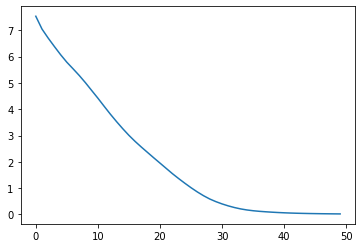

In [31]:
#!g1.1
import matplotlib.pyplot as plt


plt.plot(losses)
print(losses[-1])

In [34]:
#!g1.1
model.eval()

prompt = 'A quick brown fox'
batch = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)
batch['input_ids'] = torch.cat([space_for_prompts, batch['input_ids']], dim=1)
batch['attention_mask'] = torch.cat([torch.ones_like(space_for_prompts), batch['attention_mask']], dim=1)


for i in range(15):
    next_token = model(**batch).logits[0, -1].argmax(-1).reshape(1, 1)
    batch['input_ids'] = torch.cat([batch['input_ids'], next_token], dim=-1)
    batch['attention_mask'] = torch.cat([batch['attention_mask'], torch.ones_like(next_token)], dim=-1)

print("\nOutput:", tokenizer.decode(batch['input_ids'][0, num_prompts:].cpu().numpy().tolist()))

# if you did everything right, the model will deny that the fox jumped over the lazy dog


Output: <s>A quick brown fox did not jump over the lazy dog. Besides, that dog deserved it


### Using HuggingFace PEFT (2 points)

[`peft`](https://huggingface.co/docs/peft/index) is a transformer's sister library that allows you to apply various __p__arameter __e__fficient __f__ine-__t__uning methods to pre-trained transformers. The library imlements both prompt tuning, prefix tuning, as well as several adapter-based techniques under a common interface:



In [37]:
#!g1.1
import peft
assert isinstance(model.model.embed_tokens, nn.Embedding), "please reload the model"

peft_config = peft.PromptTuningConfig(task_type=peft.TaskType.CAUSAL_LM, num_virtual_tokens=16)
model = peft.get_peft_model(model, peft_config)  # note: for most peft methods, this line also modifies model in-place
print("Trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))
print("Total parameters (excluding quantization):", sum(p.numel() for p in model.parameters()))

Trainable parameters: 65536
Total parameters (excluding quantization): 3500478464


In [ ]:
#!g1.1
# Your task: optimize the PEFT-wrapped model to achieve next token prediction loss < 0.1, but this time using PEFT
# Please note: you no longer need to prepend PAD tokens, but you still need to skip :num_virtual_tokens: first logits.
# Finally, generate the sentence to make sure that the model learned the truth.

In [ ]:
#!g1.1
# Feel free to structure your code as you see fit - as long as it's legible :)

In [38]:
#!g1.1
the_truth = "A quick brown fox did not jump over the lazy dog. Besides, that dog deserved it anyway!"
batch = tokenizer(the_truth, return_tensors='pt', return_token_type_ids=False).to(device)
model.train();

In [39]:
#!g1.1
losses = []
num_prompts = 16
opt = torch.optim.Adam(model.parameters(), lr=0.01)

for i in range(50):
    with torch.cuda.amp.autocast():
        outputs = model(**batch)

    next_word_logits = outputs.logits[:, num_prompts : -1, :]
    true_next_tokens = batch['input_ids'][:, 1:]
    loss = F.cross_entropy(next_word_logits.flatten(0, 1), true_next_tokens.flatten(0, 1))

    opt.zero_grad()
    loss.backward(retain_graph=True)
    opt.step()
    losses.append(loss.item())

# raise NotImplemented("Your task: iteratively train the model to reduce loss using prompt optimizer (opt)")


assert loss.item() <= 0.1
print("Good job!")

Good job!


0.037004176527261734


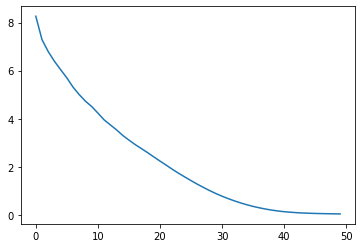

In [40]:
#!g1.1
import matplotlib.pyplot as plt


plt.plot(losses)
print(losses[-1])

In [41]:
#!g1.1
model.eval()

prompt = 'A quick brown fox'
batch = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)
# batch['input_ids'] = torch.cat([space_for_prompts, batch['input_ids']], dim=1)
# batch['attention_mask'] = torch.cat([torch.ones_like(space_for_prompts), batch['attention_mask']], dim=1)


for i in range(15):
    next_token = model(**batch).logits[0, -1].argmax(-1).reshape(1, 1)
    batch['input_ids'] = torch.cat([batch['input_ids'], next_token], dim=-1)
    batch['attention_mask'] = torch.cat([batch['attention_mask'], torch.ones_like(next_token)], dim=-1)

print("\nOutput:", tokenizer.decode(batch['input_ids'][0].cpu().numpy().tolist()))

# if you did everything right, the model will deny that the fox jumped over the lazy dog


Output: <s>A quick brown fox did not jump over the lazy dog. Besides, that dog deserved it


### Parameter-efficient finetuning with LoRA (2 points)

When training on more serious tasks, you can use low-rank adapters based on the [LoRA paper](https://arxiv.org/pdf/2106.09685.pdf).

The core idea is to add low-rank adapters __in parallel with existing linear layers,__ like this:
<center><img src="https://i.imgur.com/6bQLNiG.png" width=240px></center>

In the original LoRA paper, the adapters were only added to attention projection matrices. However, [subsequent works](https://arxiv.org/abs/2305.14314) show that it is useful to adapt FFNs as well. But before we do any training, we need to implement the basic LoRA layer.

In [117]:
#!g1.1
# re-load the model to remove any previous PEFT tuners
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_name, device_map='auto', low_cpu_mem_usage=True, offload_state_dict=True,
    load_in_4bit=True, torch_dtype=torch.float32,  # weights are 4-bit; layernorms and activations are fp32
)
for param in model.parameters():
    param.requires_grad=False
model.gradient_checkpointing_enable()
model.enable_input_require_grads()

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

In [84]:
#!g1.1
class LoRALayer(nn.Module):
    """Wraps a linear layer with LoRA-like adapter. Wraps an existing OPT linear layer"""
    def __init__(self, module: nn.Linear, rank: int):
        super().__init__()
        self.module = module  # pre-trained (frozen) linear layer
        self.adapter_A = nn.Parameter(torch.empty(module.in_features, rank, device=module.weight.device))
        nn.init.kaiming_uniform_(self.adapter_A, a=5 ** 0.5)
        self.adapter_B = nn.Parameter(torch.zeros(rank, module.out_features, device=module.weight.device))

    def forward(self, input):
        # Apply self.module and LoRA adapter, return the sum (self.module outputs + adapter outputs)
        #  <YOUR CODE HERE>

        lin = self.module(input)
        lora = (input @ self.adapter_A) @ self.adapter_B
        return lin + lora

In [97]:
#!g1.1
# test your implementation
test_linear = nn.Linear(128, 128)
test_linear.weight.data[...] = torch.eye(128)
test_adapter = LoRALayer(test_linear, rank=8)

assert torch.allclose(test_adapter(torch.ones(1, 1, 128)), test_linear.bias + 1), "please check your forward pass"

test_adapter.adapter_A.data[...] = torch.linspace(0.1, -0.5, 128 * 8).view(128, 8)
test_adapter.adapter_B.data[...] = torch.linspace(0.5, -0.1, 128 * 8).view(8, 128)
test_linear.bias.data[...] = torch.linspace(1., -1., 128)

dummy_loss = F.mse_loss(test_adapter(torch.ones(1, 128) / 128).squeeze(), torch.linspace(-1, 1, 128))
assert torch.allclose(dummy_loss, torch.tensor(1.3711389), rtol=0, atol=1e-4)
dummy_loss.backward()
assert all(w.grad is not None for w in [test_adapter.adapter_A, test_adapter.adapter_B]), "some adapter weights have no grad"
assert torch.allclose(test_adapter.adapter_A.grad.sum(), torch.tensor(-0.60158), rtol=0, atol=1e-4), "bad grad w.r.t. A"
assert torch.allclose(test_adapter.adapter_B.grad.sum(), torch.tensor(0.9931), rtol=0, atol=1e-4), "bad grad w.r.t. B"
# note: bad grad means that your code is different from LoRA paper OR that your code is not autograd-friendly (e.g. no_grad)
del dummy_loss, test_linear, test_adapter
print("All tests passed!")

All tests passed!


### Apply LoRA to the model

The code below applies LoRA adapters on top of Q/K/V linear layers in Llama attention. You may also choose to modify other layers:
* self_attn.o_proj - attention output projection
* mlp.up_proj, mlp.gate_proj, mlp.down_proj - transformer feedforward layers
* lm_head - output LM head

__Note:__ please scroll down for the homework task

In [98]:
#!g1.1
lora_rank = 8

for name, module in model.model.layers.named_modules():
    if 'LlamaDecoderLayer' in repr(type(module)):
        module.self_attn.q_proj = LoRALayer(module.self_attn.q_proj, rank=lora_rank).to(device)
        module.self_attn.k_proj = LoRALayer(module.self_attn.k_proj, rank=lora_rank).to(device)
        module.self_attn.v_proj = LoRALayer(module.self_attn.v_proj, rank=lora_rank).to(device)

assert sum(isinstance(module, LoRALayer) for module in model.modules()) == 96  # for Llama-7B

In [99]:
#!g1.1
batch = tokenizer("This model wants to share its greatest secret:", return_tensors='pt', return_token_type_ids=False)
# test a single training step, make sure we get meaningful gradients
with torch.cuda.amp.autocast(dtype=torch.float32):
    out = model.forward(**batch)
    (out.logits.norm() / 100).backward()

for i, module in enumerate(model.modules()):
    if isinstance(module, LoRALayer):
        assert module.adapter_B.grad is not None
        assert module.adapter_B.grad.norm().item() > 0

model.zero_grad(set_to_none=True)
print("Grad check successful, well done!")

2023-11-27 18:41:56.868467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Grad check successful, well done!


### (example) How to train your model

The example below shows how to train the LoRA adapters on a dummy dataset. You will need to run a _similar_ training task later.

__Note:__ please scroll down for the homework task

In [125]:
#!g1.1
# checking if the model can learn. Change max_steps for proper training
import datasets


data = datasets.load_dataset("Abirate/english_quotes", split="train[:32]") # 32 lines
data = data.map(lambda samples: tokenizer(samples['quote']), batched=True)
model._hf_peft_config_loaded = True  # silence a warning from HF trainer

trainer = transformers.Trainer(
    model=model, train_dataset=data,
    args=transformers.TrainingArguments(
        per_device_train_batch_size=2, gradient_accumulation_steps=1,
        # note: if you want larger batch size, increase gradient_accumulation_steps
        warmup_steps=250, max_steps=100, learning_rate=2e-4, fp16=True,
        logging_steps=1, output_dir='outputs', report_to=None),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False)
)
# if you see cache warnings, set `model.config.use_cache = False` to silence them. Please re-enable for inference!

trainer.train()

# NOTE: this is just an example! you do not have to wait for this progressbar to finish :)

### Final task: *actually* train the model (4 points)

Your task is to fine-tune the model to _generate python code_. Please use the above examples for inspiration. More specifically,

* __dataset:__ use [codeparrot-clean](https://huggingface.co/datasets/codeparrot/codeparrot-clean) or any other data containing python code. Since you do not need much data for this excercise, it is enough to use just shorter validation subset of `codeparrots`
* __preprocessing:__ select python code based on file extentions (.py)  (may skip in case of codeparrot - it is 100% python)
* __short lines:__ please take the first 512 characters of each line
* __adapter type:__ please use LoRA as defined above __plus at least one of:__
   - extra adapter on lm_head
   - extra adapter on MLP components (mlp.*)
   - trainable input embeddings (requires tweaking memory usage)

* __training:__ you do not have to train to convergence. If all goes well, your model should `.generate` code after 500 steps. Please use batch size of at least 4 (4 x 1 x 512 tokens) using `gradient_accumulation_steps=4`.


Note: the peft library also has LoRA implementation. However, we ask that for this assignment you show at least one complete training run with your own LoRA code.

__Alternative assignment:__ Instead of doing python code, feel free to substitute the task with any other dataset, e.g. your favorite artist or podcast, as long as it's ethical. If you choose your own task, please show examples of what your model learned - or did not learn, akin to the code examples below.

In [118]:
#!g1.1
prompts =  ['', 'import', 'from', 'while', 'try', 'if', 'for', 'torch']  # feel free to add a few more that are not 100% assiciated with Python

# <A WHOLE LOT OF YOUR CODE>
# generate baseline samples with the selected prompts before finetuning
# please feel free to use transformers.Trainer (as above) or your custom training code
# after the training concludes, please show examples of text generated by your model. It is expected to look like Python code fragments
# print the generation examples nicely (suggestion: use pandas or HTML) for easier comparison
# note: your LoRA-enhanced model can run generation the same way as the non-trained model (above)

In [119]:
#!g1.1
model.eval()
gen_before = []

for prompt in prompts:
    batch = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)
    for i in tqdm(range(256)):
        next_token = model(**batch).logits[0, -1].argmax(-1).reshape(1, 1)
        batch['input_ids'] = torch.cat([batch['input_ids'], next_token], dim=-1)
        batch['attention_mask'] = torch.cat([batch['attention_mask'], torch.ones_like(next_token)], dim=-1)
    gen_before.append(tokenizer.decode(batch['input_ids'][0].cpu().numpy().tolist()))

gen_before = [i[3:] for i in gen_before]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

In [86]:
#!g1.1
lora_rank = 8

for name, module in model.model.layers.named_modules():
    if 'LlamaDecoderLayer' in repr(type(module)):
        module.self_attn.q_proj = LoRALayer(module.self_attn.q_proj, rank=lora_rank).to(device)
        module.self_attn.k_proj = LoRALayer(module.self_attn.k_proj, rank=lora_rank).to(device)
        module.self_attn.v_proj = LoRALayer(module.self_attn.v_proj, rank=lora_rank).to(device)
        
#         module.mlp.gate_proj = LoRALayer(module.mlp.gate_proj, rank=lora_rank).to(device)
#         module.mlp.up_proj = LoRALayer(module.mlp.up_proj, rank=lora_rank).to(device)
#         module.mlp.down_proj = LoRALayer(module.mlp.down_proj, rank=lora_rank).to(device)

model.lm_head = LoRALayer(model.lm_head, rank=lora_rank).to(device)

In [87]:
#!g1.1
def preproc(samples):
    new_content = []
    for content in samples['content']:
        content = "\n".join([line[:512] for line in content.split("\n")])
        new_content.append(content)
    tokens_batch = tokenizer(new_content)
    new_tokens_batch = {"input_ids": [], 'attention_mask': []}
    
    for input_ids, attention_mask in zip(tokens_batch['input_ids'], tokens_batch['attention_mask']):
        new_tokens_batch['input_ids'].append(input_ids[:128])
        new_tokens_batch['attention_mask'].append(attention_mask[:128])

    return new_tokens_batch

In [88]:
#!g1.1
import datasets


data = datasets.load_dataset("codeparrot/codeparrot-clean-valid")
data = data.map(lambda samples: preproc(samples), batched=True)
model._hf_peft_config_loaded = True

/home/jupyter/.local/lib/python3.10/site-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Parameter 'function'=<function <lambda> at 0x7f7dfb2d9c60> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/61373 [00:00<?, ? examples/s]

In [89]:
#!g1.1
model.train()

trainer = transformers.Trainer(
    model=model, train_dataset=data['train'],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=4, gradient_accumulation_steps=4,
        warmup_steps=700, max_steps=499, learning_rate=2e-4, fp16=True,
        logging_steps=1, output_dir='outputs', report_to=None),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False)
)

trainer.train()

2023-11-28 11:13:52.029056: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/home/jupyter/.local/lib/python3.10/site-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


Step,Training Loss
1,1.519200
2,1.364100
3,1.536300
4,1.330100
5,1.434100
6,1.568800
7,1.516500
8,1.371600
9,1.204500
10,1.498000


TrainOutput(global_step=499, training_loss=1.2680927779010398, metrics={'train_runtime': 1542.6876, 'train_samples_per_second': 5.175, 'train_steps_per_second': 0.323, 'total_flos': 4.055467617681408e+16, 'train_loss': 1.2680927779010398, 'epoch': 0.13})

In [90]:
#!g1.1
model.eval()
gen_after = []

for prompt in prompts:
    batch = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)
    for i in tqdm(range(256)):
        next_token = model(**batch).logits[0, -1].argmax(-1).reshape(1, 1)
        batch['input_ids'] = torch.cat([batch['input_ids'], next_token], dim=-1)
        batch['attention_mask'] = torch.cat([batch['attention_mask'], torch.ones_like(next_token)], dim=-1)
    gen_after.append(tokenizer.decode(batch['input_ids'][0].cpu().numpy().tolist()))
    
gen_after = [i[3:] for i in gen_after] 

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

In [124]:
#!g1.1
# This template helps to compare generated code samples in pretty table form
# feel free to present your work in other forms

from IPython.display import HTML, display
table_template = """<table style="border:1px solid black" >
  <tr>
    <th style="text-align: center; border:1px solid black">PROMPT</th>
    <th style="text-align: center; border:1px solid black">BEFORE</th>
    <th style="text-align: center; border:1px solid black">AFTER</th>
  </tr>
{}
</table>"""

row_template = '''  <tr>
    <td style="width:20%; border:1px solid black"><pre align="left">`{}`</pre></td>
    <td style="width:40%; border:1px solid black"><pre align="left">{}</pre></td>
    <td style="width:40%; border:1px solid black"><pre align="left">{}</pre></td>
  </tr>'''

rows = []

for prompt, gen_b, gen_a in zip(prompts, gen_before, gen_after):
    # replace placeholders in the format() arguments
    rows.append(row_template.format(prompt, gen_b, gen_a))

display(HTML(table_template.format('\n'.join(rows))))

PROMPT,BEFORE,AFTER
``,▶▶ 2019-2020 School Year The 2019-2020 school year is here! We are so excited to welcome our new students and families to the school. We are also excited to welcome back our returning families. We are looking forward to another great year at the school. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are also looking forward to another great year of learning and growing together. We are,# -*- coding: utf-8 -*- from __future__ import unicode_literals import os import sys import logging import re import subprocess import shutil import tempfile import time import traceback import warnings from django.conf import settings from django.core.exceptions import ImproperlyConfigured from django.core.management import call_command from django.core.management.base import CommandError from django.core.management.base import CommandParser from django.core.management.base import NoArgsCommand from django.core.management.base import OutputWrapper from django.core.management.base import SubCommand from django.core.management.base import TextCommand from django.core.management.base import ZenCommand from django.core.management.commands.migrate import MigrateCommand from django.core.management.commands.migrate import MigrateCommand as MigrateCommandBase from django.core.management.commands.migrate import MigrateCommand as MigrateCommandBase from django.core.management.commands.migrate import M
`import`,import Foundation public extension NSURL { public var absoluteString: String { return String(cString: CFBundleGetBundleWithURL(self).UTF8String) } }package com.google.gerrit.server.restapi; import static javax.ws.rs.core.MediaType.APPLICATION_JSON; import com.google.gerrit.extensions.restapi.RestApiModule; import com.google.gerrit.extensions.restapi.RestApiModule.RestApiModuleBuilder; import com.google.gerrit.extensions.restapi.RestApiModule.RestApiModuleBuilderImpl; import com.google.gerrit.extensions.restapi.RestApiModule.RestApiModuleBuilderImpl.RestApiModuleBuilderImplImpl; import com.google.gerrit.extensions.restapi.RestApiModule.RestApiModuleBuilderImplImpl.RestApiModuleBuilderImplImplImpl; import com.google.gerrit.extensions.restapi.RestApiModule.RestApiModuleBuilderImplImplImplImpl; import com.google.gerrit.extensions.restapi.RestApiModule.RestApi,import os import sys import subprocess import shutil import tempfile import re import glob import time import logging import logging.handlers import logging.config import logging.config.fileconfig import logging.config.fileconfig_parser import logging.config.fileconfig_parser.parser import logging.config.fileconfig_parser.parser_defaults import logging.config.fileconfig_parser.parser_defaults.defaults import logging.config.fileconfig_parser.parser_defaults.defaults.defaults import logging.config.fileconfig_parser.parser_defaults.defaults.defaults.defaults import logging.config.fileconfig_parser.parser_defaults.defaults.defaults.defaults.defaults import logging.config.fileconfig_parser.parser_defaults.defaults.defaults.defaults.defaults.defaults.defaults import logging.config.fileconfig_parser.parser_defaults.def

If you reach this: congratulations! you've completed everything in this practice session.

If you want to dig deeper, try to implement prompt-tuning (for bonus points!).
You can read more about prompt tuning variants in paper [1](https://arxiv.org/abs/2104.08691) or paper [2](https://arxiv.org/abs/2101.00190). Both versions can be implemented by passing trainable prompts as `model.forward(..., past_key_values=your_prompts)`.



### Read more

* How post-training quantization works: https://arxiv.org/abs/2208.07339
* An overview of running large models: https://huggingface.co/docs/accelerate/package_reference/big_modeling
* A general library for different adapter types: https://adapterhub.ml/


### [extra info] Running other models.

This notebook's code can run with other models of similar size, such as [Falcon-7B](https://huggingface.co/tiiuae/falcon-7b), [OPT-6.7B](https://huggingface.co/facebook/opt-6.7b) or [BLOOM-7.1B](https://huggingface.co/bigscience/bloom-7b1). However, they will require minor code tweaks:
1. change the model name in `AutoModelForCausalLM.from_pretrained()` __and__ `AutoTokenizer`
2. In the prompt tuning code, change `model.model.embed_tokens` to refer to the target model's word embeddings. Simply `print(model)` to navigate to them.
3. Change code to add Lora layers - specifically where you what the transformer block components, since those components now have different names.